<a href="https://colab.research.google.com/github/tomasallemand/Testing_Datasets/blob/main/DS_Job_Salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Practicing with DataBases**

In [600]:
import pandas as pd
import numpy as np
import plotly.express as px
import requests as rq
import matplotlib as plt
import seaborn as sns

In [601]:
df = pd.read_csv('https://raw.githubusercontent.com/tomasallemand/dataframe_testing/main/ds_salaries.csv')

**Source and further information**: https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

In [602]:
# Initial overview of the dataset:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [603]:
#DataFrame Size
df.shape

(3755, 11)

#Data Info

In [604]:
import requests
from bs4 import BeautifulSoup
import json

# Getting the HTML content of the source
url = 'https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries'
response = requests.get(url)
html_content = response.text

# Analyzing content
soup = BeautifulSoup(html_content, 'html.parser')

# Looking for the JSON script which contains the description of the varriables
script_tags = soup.find_all('script', attrs={'type': 'application/ld+json'})
for script_tag in script_tags:
    script_content = script_tag.string
    if script_content:
        # Analyzing JSON content
        json_data = json.loads(script_content)
        if '@type' in json_data and json_data['@type'] == 'Dataset':
            # Extracting only the description of variables
            description = json_data['description']
            variable_description = description.split('### Content\n| Column')[1].split(' |\n\n### Acknowledgements')[0]
            print(variable_description)
            break

          | Description                                                                                                                                                           |
|--------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| work_year          | The year the salary was paid.                                                                                                                                                                  |
| experience_level   | The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director |
| employment_type    | The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance                                                             

In [605]:
import re
# Text:
description_text = """
          | Description                                                                                                                                                           |
|--------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| work_year          | The year the salary was paid.                                                                                                                                                                  |
| experience_level   | The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director |
| employment_type    | The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance                                                                                                       |
| job_title          | The role worked in during the year.                                                                                                                                                            |
| salary             | The total gross salary amount paid.                                                                                                                                                            |
| salary_currency    | The currency of the salary paid as an ISO 4217 currency code.                                                                                                                                  |
| salary_in_usd      | The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).                                                                                          |
| employee_residence | Employee's primary country of residence in during the work year as an ISO 3166 country code.                                                                                                   |
| remote_ratio       | The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)                                |
| company_location   | The country of the employer's main office or contracting branch as an ISO 3166 country code.                                                                                                   |
| company_size       | The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)                   """

# Regular Expressions
matches = re.findall(r'\|\s*(\w+)\s*\|\s*([^|]+)\s*\|', description_text)

# Crear DataFrame
df_info = pd.DataFrame(matches, columns=['Variable', 'Description'])

# DataFrame
df_info = df_info.drop(0)
df_info = df_info.reset_index(drop=True)
pd.set_option('display.max_colwidth', None)
df_info=pd.DataFrame(df_info)

df_info

,Variable,Description
0,work_year,The year the salary was paid.
1,experience_level,The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director
2,employment_type,The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance
3,job_title,The role worked in during the year.
4,salary,The total gross salary amount paid.
5,salary_currency,The currency of the salary paid as an ISO 4217 currency code.
6,salary_in_usd,The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).
7,employee_residence,Employee's primary country of residence in during the work year as an ISO 3166 country code.
8,remote_ratio,"The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)"
9,company_location,The country of the employer's main office or contracting branch as an ISO 3166 country code.


**Nulls**

In [606]:
# Looking for nulls
Q_nulls=df.isnull().sum()
len_df=len(df)
for column in df.columns:
    percentage_nulls = (Q_nulls[column] / len_df) * 100
    print(f"{column}: {percentage_nulls:.2f}%")

work_year: 0.00%
experience_level: 0.00%
employment_type: 0.00%
job_title: 0.00%
salary: 0.00%
salary_currency: 0.00%
salary_in_usd: 0.00%
employee_residence: 0.00%
remote_ratio: 0.00%
company_location: 0.00%
company_size: 0.00%


There aren't any null values in any column

In [607]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [608]:
df.head(0)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size


#Data Wrangling

**Data Filtering**

In [609]:
from IPython.display import display
columns_to_count = ['experience_level', 'employment_type', 'job_title',
                    'salary_currency', 'employee_residence', 'remote_ratio',
                    'company_location', 'company_size']

for column in columns_to_count:
    display(df[column].value_counts())

experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64

employment_type
FT    3718
PT      17
CT      10
FL      10
Name: count, dtype: int64

job_title
Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: count, Length: 93, dtype: int64

salary_currency
USD    3224
EUR     236
GBP     161
INR      60
CAD      25
AUD       9
SGD       6
BRL       6
PLN       5
CHF       4
HUF       3
DKK       3
JPY       3
TRY       3
THB       2
ILS       1
HKD       1
CZK       1
MXN       1
CLP       1
Name: count, dtype: int64

employee_residence
US    3004
GB     167
CA      85
ES      80
IN      71
      ... 
BA       1
AM       1
CY       1
KW       1
MT       1
Name: count, Length: 78, dtype: int64

remote_ratio
0      1923
100    1643
50      189
Name: count, dtype: int64

company_location
US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: count, Length: 72, dtype: int64

company_size
M    3153
L     454
S     148
Name: count, dtype: int64

Some variable values are insufficient for modeling purposes. For example, modeling salaries paid in Mexican pesos is challenging due to a lack of sufficient data. It's advisable to exclude such cases and concentrate on variables with more substantial information, such as salaries denoted in USD. This issue also extends to other variables, such as the employee's country of residence, where some countries have only a few cases. Predictions for these cases may not be reliable.

To ensure accurate predictions:

- We will focus only on salaries denoted in USD, as other currencies lack sufficient data.
- Similarly, for the columns "employee_residence" and "company_location", we will only retain entries related to the United States. For these two cases we'll drop both columns.
- For "experience_level", we'll only work with "SE","MI" and "EN", because "EX" hasn't got too many cases.
- Regarding "job_title", we will consolidate similar job titles into broader categories.

In [610]:
df['job_title'].unique()

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

In [611]:
data = {'job_title': ['Principal Data Scientist', 'ML Engineer', 'Data Scientist', 'Applied Scientist',
                      'Data Analyst', 'Data Modeler', 'Research Engineer', 'Analytics Engineer',
                      'Business Intelligence Engineer', 'Machine Learning Engineer', 'Data Strategist',
                      'Data Engineer', 'Computer Vision Engineer', 'Data Quality Analyst', 'Compliance Data Analyst',
                      'Data Architect', 'Applied Machine Learning Engineer', 'AI Developer', 'Research Scientist',
                      'Data Analytics Manager', 'Business Data Analyst', 'Applied Data Scientist', 'Staff Data Analyst',
                      'ETL Engineer', 'Data DevOps Engineer', 'Head of Data', 'Data Science Manager', 'Data Manager',
                      'Machine Learning Researcher', 'Big Data Engineer', 'Data Specialist', 'Lead Data Analyst',
                      'BI Data Engineer', 'Director of Data Science', 'Machine Learning Scientist', 'MLOps Engineer',
                      'AI Scientist', 'Autonomous Vehicle Technician', 'Applied Machine Learning Scientist',
                      'Lead Data Scientist', 'Cloud Database Engineer', 'Financial Data Analyst',
                      'Data Infrastructure Engineer', 'Software Data Engineer', 'AI Programmer', 'Data Operations Engineer',
                      'BI Developer', 'Data Science Lead', 'Deep Learning Researcher', 'BI Analyst',
                      'Data Science Consultant', 'Data Analytics Specialist', 'Machine Learning Infrastructure Engineer',
                      'BI Data Analyst', 'Head of Data Science', 'Insight Analyst', 'Deep Learning Engineer',
                      'Machine Learning Software Engineer', 'Big Data Architect', 'Product Data Analyst',
                      'Computer Vision Software Engineer', 'Azure Data Engineer', 'Marketing Data Engineer',
                      'Data Analytics Lead', 'Data Lead', 'Data Science Engineer', 'Machine Learning Research Engineer',
                      'NLP Engineer', 'Manager Data Management', 'Machine Learning Developer', '3D Computer Vision Researcher',
                      'Principal Machine Learning Engineer', 'Data Analytics Engineer', 'Data Analytics Consultant',
                      'Data Management Specialist', 'Data Science Tech Lead', 'Data Scientist Lead', 'Cloud Data Engineer',
                      'Data Operations Analyst', 'Marketing Data Analyst', 'Power BI Developer', 'Product Data Scientist',
                      'Principal Data Architect', 'Machine Learning Manager', 'Lead Machine Learning Engineer',
                      'ETL Developer', 'Cloud Data Architect', 'Lead Data Engineer', 'Head of Machine Learning',
                      'Principal Data Analyst', 'Principal Data Engineer', 'Staff Data Scientist', 'Finance Data Analyst']}

# Replacements
df['job_title'] = df['job_title'].replace({
    'Applied Data Scientist': 'Data Scientist',
    'Applied Machine Learning Engineer': 'Machine Learning Engineer',
    'Data Quality Analyst': 'Data Analyst',
    'Compliance Data Analyst': 'Data Analyst',
    'Research Engineer': 'Research Role',
    'Research Scientist': 'Research Role',
    'Business Intelligence Engineer': 'BI Role',
    'BI Developer': 'BI Role',
    'BI Data Analyst': 'BI Role',
    'Data Engineer': 'Data Engineer',
    'ETL Engineer': 'Data Engineer',
    'Data DevOps Engineer': 'Data Engineer',
    'Machine Learning Researcher': 'Machine Learning Engineer',
    'Big Data Engineer': 'Data Engineer',
    'Lead Data Analyst': 'Data Analyst',
    'Director of Data Science': 'Data Scientist',
    'Machine Learning Scientist': 'Machine Learning Engineer',
    'AI Scientist': 'Machine Learning Engineer',
    'Applied Machine Learning Scientist': 'Machine Learning Engineer',
    'Lead Data Scientist': 'Data Scientist',
    'Cloud Database Engineer': 'Cloud Role',
    'Azure Data Engineer': 'Cloud Role',
    'Cloud Data Engineer': 'Cloud Role',
    'Data Infrastructure Engineer': 'Data Engineer',
    'Software Data Engineer': 'Data Engineer',
    'Data Operations Engineer': 'Data Engineer',
    'BI Analyst': 'BI Role',
    'Data Science Lead': 'Data Scientist',
    'Deep Learning Researcher': 'Machine Learning Engineer',
    'Data Analytics Specialist': 'Data Analyst',
    'Machine Learning Infrastructure Engineer': 'Machine Learning Engineer',
    'Deep Learning Engineer': 'Machine Learning Engineer',
    'Machine Learning Software Engineer': 'Machine Learning Engineer',
    'Big Data Architect': 'Data Engineer',
    'Computer Vision Software Engineer': 'Computer Vision Engineer',
    'Marketing Data Engineer': 'Data Engineer',
    'Data Analytics Lead': 'Data Analyst',
    'Product Data Analyst': 'Data Analyst',
    'Data Science Engineer': 'Data Scientist',
    'Machine Learning Research Engineer': 'Machine Learning Engineer',
    'NLP Engineer': 'Machine Learning Engineer',
    'Machine Learning Developer': 'Machine Learning Engineer',
    '3D Computer Vision Researcher': 'Computer Vision Engineer',
    'Principal Machine Learning Engineer': 'Machine Learning Engineer',
    'Data Analytics Engineer': 'Data Analyst',
    'Analytics Engineer': 'Data Analyst',  # Added the missing comma here
    'Data Analytics Consultant': 'Data Analyst',
    'Data Management Specialist': 'Data Engineer',
    'Data Science Tech Lead': 'Data Scientist',
    'Data Scientist Lead': 'Data Scientist',
    'Cloud Data Engineer': 'Cloud Role',
    'Data Operations Analyst': 'Data Engineer',
    'Marketing Data Analyst': 'Data Analyst',
    'Power BI Developer': 'BI Role',
    'Product Data Scientist': 'Data Scientist',
    'Principal Data Architect': 'Data Engineer',
    'Machine Learning Manager': 'Machine Learning Engineer',
    'Lead Machine Learning Engineer': 'Machine Learning Engineer',
    'ETL Developer': 'Data Engineer',
    'Cloud Data Architect': 'Cloud Role',
    'Lead Data Engineer': 'Data Engineer',
    'Head of Machine Learning': 'Machine Learning Engineer',
    'Principal Data Analyst': 'Data Analyst',
    'Principal Data Engineer': 'Data Engineer',
    'Staff Data Scientist': 'Data Scientist',
    'Finance Data Analyst': 'Data Analyst',
    'Data Analytics Manager': 'Data Analyst',
    'Staff Data Analyst': 'Data Analyst',
    'Data Science Manager': 'Data Scientist',
    'Business Data Analyst': 'Data Analyst',  # Removed the extra space at the end
    'AI Programmer': 'Machine Learning Engineer',
    'Data Science Consultant': 'Data Scientist',
    'BI Data Engineer': 'BI Role',
    'Financial Data Analyst': 'Data Analyst',
    'Principal Data Scientist': 'Data Scientist',
    'ML Engineer': 'Machine Learning Engineer',
    'AI Developer': 'Machine Learning Engineer',
    'Head of Data Science': 'Data Scientist'
})

In [612]:
print(f"Number of unique job titles: {len(df['job_title'].unique())}")
print(df['job_title'].value_counts())

Number of unique job titles: 20
job_title
Data Engineer                    1099
Data Scientist                    987
Data Analyst                      791
Machine Learning Engineer         452
Research Role                     119
Data Architect                    101
Applied Scientist                  58
BI Role                            43
Data Manager                       29
Computer Vision Engineer           27
Data Specialist                    14
Head of Data                       10
Cloud Role                         10
MLOps Engineer                      4
Data Strategist                     2
Data Modeler                        2
Autonomous Vehicle Technician       2
Insight Analyst                     2
Data Lead                           2
Manager Data Management             1
Name: count, dtype: int64


In [613]:
# we will keep only those jobs titles with more than 100 cases.
job_counts = df['job_title'].value_counts()
jobs_to_keep = job_counts[job_counts > 100].index

# New Dataframe
df = df[df['job_title'].isin(jobs_to_keep)]

print(df['job_title'].value_counts())


job_title
Data Engineer                1099
Data Scientist                987
Data Analyst                  791
Machine Learning Engineer     452
Research Role                 119
Data Architect                101
Name: count, dtype: int64


In [614]:
df['job_title'].value_counts()

job_title
Data Engineer                1099
Data Scientist                987
Data Analyst                  791
Machine Learning Engineer     452
Research Role                 119
Data Architect                101
Name: count, dtype: int64

In [615]:
df['salary_currency'].value_counts()

salary_currency
USD    3046
EUR     225
GBP     157
INR      56
CAD      24
AUD       7
PLN       5
SGD       5
BRL       4
CHF       4
JPY       3
TRY       3
THB       2
HUF       2
ILS       1
HKD       1
CZK       1
MXN       1
CLP       1
DKK       1
Name: count, dtype: int64

In [616]:
# we will keep only the USD currency salaries. The diference with the rest is significant. Also, te column "salary" always shows the USD salary.
df = df[df['salary_currency'] == 'USD']
df.shape

(3046, 11)

In [617]:
df = df[df['employment_type'].isin(['FT', 'PT'])]

df['employment_type'].value_counts()

employment_type
FT    3024
PT       6
Name: count, dtype: int64

In [618]:
# The column 'employment_type' doesn't have relevant information since amlost every case is a full time type employment. Let's drop it:
df.drop(columns=["employment_type", "work_year","employee_residence","company_location","salary_currency"], inplace=True)

In [619]:
df

,experience_level,job_title,salary,salary_in_usd,remote_ratio,company_size
3,SE,Data Scientist,175000,175000,100,M
4,SE,Data Scientist,120000,120000,100,M
7,SE,Data Scientist,219000,219000,0,M
8,SE,Data Scientist,141000,141000,0,M
9,SE,Data Scientist,147100,147100,0,M
...,...,...,...,...,...,...
3745,SE,Data Scientist,168000,168000,0,S
3747,MI,Machine Learning Engineer,423000,423000,50,L
3750,SE,Data Scientist,412000,412000,100,L
3751,MI,Data Scientist,151000,151000,100,L


In [620]:
df.shape

(3030, 6)

In [621]:
df.isnull().sum()

experience_level    0
job_title           0
salary              0
salary_in_usd       0
remote_ratio        0
company_size        0
dtype: int64

In [622]:
df['experience_level'].value_counts()

experience_level
SE    2228
MI     506
EN     202
EX      94
Name: count, dtype: int64

In [623]:
df = df[df["experience_level"] != "EX"]

In [624]:
print(f"Te amount of each cases in the column {df['experience_level'].value_counts()} is")
print(f"The current size of the DataFrame is {df.shape}")

Te amount of each cases in the column experience_level
SE    2228
MI     506
EN     202
Name: count, dtype: int64 is
The current size of the DataFrame is (2936, 6)


In [625]:
df.head()

,experience_level,job_title,salary,salary_in_usd,remote_ratio,company_size
3,SE,Data Scientist,175000,175000,100,M
4,SE,Data Scientist,120000,120000,100,M
7,SE,Data Scientist,219000,219000,0,M
8,SE,Data Scientist,141000,141000,0,M
9,SE,Data Scientist,147100,147100,0,M


#Outliers

In [626]:
# Numeric columns
numeric_columns = df.select_dtypes(include=['number'])

# Quartiles:
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

# Remove outliers:
df = df[~((numeric_columns < (Q1 - 1.5 * IQR)) | (numeric_columns > (Q3 + 1.5 * IQR))).any(axis=1)]

#EXPLORATORY DATA ANALYSIS

In [627]:
import seaborn as sns
import matplotlib.pyplot as plt

In [628]:
df

,experience_level,job_title,salary,salary_in_usd,remote_ratio,company_size
3,SE,Data Scientist,175000,175000,100,M
4,SE,Data Scientist,120000,120000,100,M
7,SE,Data Scientist,219000,219000,0,M
8,SE,Data Scientist,141000,141000,0,M
9,SE,Data Scientist,147100,147100,0,M
...,...,...,...,...,...,...
3742,MI,Data Scientist,138350,138350,100,M
3743,MI,Data Engineer,130800,130800,100,M
3745,SE,Data Scientist,168000,168000,0,S
3751,MI,Data Scientist,151000,151000,100,L


<Axes: xlabel='salary_in_usd', ylabel='Count'>

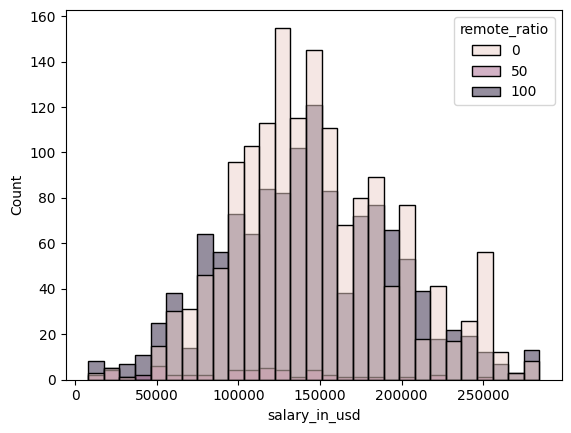

In [629]:
sns.histplot(data=df,x='salary_in_usd',hue='remote_ratio')

In [630]:
px.box(df,y='salary_in_usd',color='experience_level')

<Axes: xlabel='salary_in_usd', ylabel='Count'>

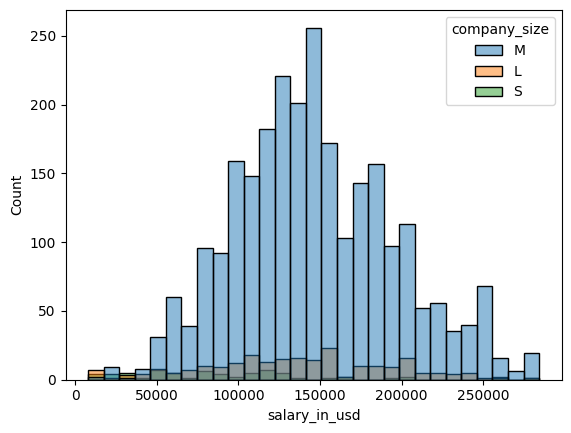

In [631]:
sns.histplot(data=df,x='salary_in_usd',hue='company_size')

In [632]:
px.box(df,x='job_title',y='salary_in_usd')

#Dummies

In [633]:
df

,experience_level,job_title,salary,salary_in_usd,remote_ratio,company_size
3,SE,Data Scientist,175000,175000,100,M
4,SE,Data Scientist,120000,120000,100,M
7,SE,Data Scientist,219000,219000,0,M
8,SE,Data Scientist,141000,141000,0,M
9,SE,Data Scientist,147100,147100,0,M
...,...,...,...,...,...,...
3742,MI,Data Scientist,138350,138350,100,M
3743,MI,Data Engineer,130800,130800,100,M
3745,SE,Data Scientist,168000,168000,0,S
3751,MI,Data Scientist,151000,151000,100,L


**Encoding categorical columns**

**Experience Level**

In [634]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

In [635]:
encoded_experience= encoder.fit_transform(df[['experience_level']]).toarray()
encoded_experience=pd.DataFrame(encoded_experience, columns=encoder.categories_[0])
encoded_experience.index = df.index
df=df.join(encoded_experience)
df = df.drop(['experience_level'],axis=1)
df.isnull().sum()

job_title        0
salary           0
salary_in_usd    0
remote_ratio     0
company_size     0
EN               0
MI               0
SE               0
dtype: int64

**Job title**

In [636]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False)

# Encodig 'job_title'
encoded_jobtitle = encoder.fit_transform(df[['job_title']])
encoded_jobtitle = pd.DataFrame(encoded_jobtitle, columns=encoder.categories_[0])

# Match indexes
encoded_jobtitle.index = df.index

# Joinin the DF
df = df.join(encoded_jobtitle)

# Dropping the original column
df = df.drop(['job_title'], axis=1)

# Checking for null values
print(df.isnull().sum())


salary                       0
salary_in_usd                0
remote_ratio                 0
company_size                 0
EN                           0
MI                           0
SE                           0
Data Analyst                 0
Data Architect               0
Data Engineer                0
Data Scientist               0
Machine Learning Engineer    0
Research Role                0
dtype: int64


In [637]:
df.shape

(2882, 13)

**Company Size**

In [638]:
# OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False)

# Encoding 'company_size'
companysize_encoded = encoder.fit_transform(df[['company_size']])
companysize_encoded = pd.DataFrame(companysize_encoded, columns=encoder.categories_[0])

# Match indexes
companysize_encoded.index = df.index

# Join DF
df = df.join(companysize_encoded)

# Dropping the original column
df = df.drop(['company_size'], axis=1)

# Checking for null values
print(df.isnull().sum())


salary                       0
salary_in_usd                0
remote_ratio                 0
EN                           0
MI                           0
SE                           0
Data Analyst                 0
Data Architect               0
Data Engineer                0
Data Scientist               0
Machine Learning Engineer    0
Research Role                0
L                            0
M                            0
S                            0
dtype: int64


In [639]:
df.head(2)

,salary,salary_in_usd,remote_ratio,EN,MI,SE,Data Analyst,Data Architect,Data Engineer,Data Scientist,Machine Learning Engineer,Research Role,L,M,S
3,175000,175000,100,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,120000,120000,100,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


#Model

**Defining the input variables for the model and the target**

In [640]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y)

In [641]:
x=df.drop(['salary_in_usd'],axis=1)
y=df['salary_in_usd']

In [642]:
print(f"train df size: {X_train.shape,y_train.shape}")
print(f"test df size: {X_test.shape,y_test.shape}")

train df size: ((2067, 16), (2067,))
test df size: ((689, 16), (689,))


In [644]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Only selected features
X_selected = df[['EN', 'MI', 'Data Analyst', 'Data Engineer', 'Machine Learning Engineer', 'Research Role', 'S']]
y = df['salary_in_usd']

# Split in train and test
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Create and train LR
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Testing the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 2192785733.5518246
R^2 Score: 0.19355452680973928


In [451]:
from xgboost import XGBRegressor

# Create and train XGBoost
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Testing XGBoost model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost:")
print(f"Mean Squared Error: {mse_xgb}")
print(f"R^2 Score: {r2_xgb}")

XGBoost:
Mean Squared Error: 1930674825.0106037
R^2 Score: 0.17629611830630354


## Trying with feature selection

In [452]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import cross_val_score

# Feature selection
sfs = SFS(LinearRegression(),
          k_features=10,
          forward=True,
          floating=False,
          scoring='r2',
          cv=5)

sfs.fit(x, y)
selected_features = list(sfs.k_feature_names_)

# Train-test split
X_selected = df[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Model training with cross-validation
model = LinearRegression()
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

# Model evaluation
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Cross-Validation Scores: [0.23111226 0.20651481 0.21177367 0.16232712 0.14802693]
Mean Squared Error: 1912046141.6672995
R^2 Score: 0.18424386723944564


The model's performance is quite poor, with low R^2 scores indicating that it does not explain much of the variance in the salary data.
The high MSE suggests the model's predictions are not very accurate.

# Trying with another model

##Classification

<Axes: xlabel='salary_in_usd', ylabel='Count'>

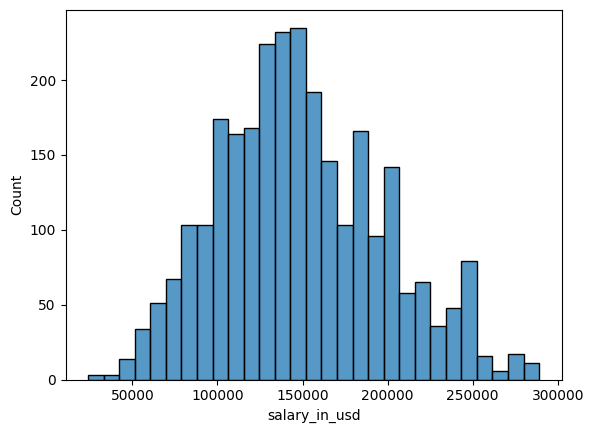

In [325]:
#In order to improve the performance of te model, we'll try to create two categories of salaries, based on the median salary.

sns.histplot(data=df,x='salary_in_usd')

In [326]:
# Median of the target variable
median_salary = df['salary_in_usd'].median()

# New column 'income_level' -> 0  low income // 1 -> high income
df['income_level'] = np.where(df['salary_in_usd'] > median_salary, 1, 0)

# Removing the original 'salary_in_usd' column
df.drop(columns=['salary_in_usd'], inplace=True)

# Rename the categories
df.head()

,work_year,remote_ratio,EN,EX,MI,SE,FT,Data Analyst,Data Architect,Data Engineer,Data Scientist,Machine Learning Engineer,Research Role,L,M,S,income_level
9,2023,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
10,2023,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
11,2023,100,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
12,2023,100,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
17,2023,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1


In [351]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from xgboost import XGBClassifier

# Split the data into X1 and y1
x1 = df.drop(columns=['income_level'])
y1 = df['income_level']

# Split the data -> Training and test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2, random_state=42)

##Feature selection

In [352]:
from sklearn.model_selection import KFold
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs = SFS(KNN(),k_features=8)
sfs.fit(X_train1,y_train1)
sfs.k_feature_names_

('EN',
 'MI',
 'FT',
 'Data Scientist',
 'Machine Learning Engineer',
 'L',
 'M',
 'S')

In [353]:
list(sfs.k_feature_names_)

['EN',
 'MI',
 'FT',
 'Data Scientist',
 'Machine Learning Engineer',
 'L',
 'M',
 'S']

In [354]:
X_train_model1=X_train1[list(sfs.k_feature_names_)].copy()

In [355]:
model1=KNN()

##Cross Validation

In [356]:
cross_val_score(model1,X_train_model1,y_train1).mean()

0.5884941249226964

#Final Model

In [365]:
clf_final=KNN()
X_train_final=X_train_model1

In [366]:
X_train_final

,EN,MI,FT,Data Scientist,Machine Learning Engineer,L,M,S
1027,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1782,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3254,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
923,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
251,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
2078,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1389,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1435,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1638,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [367]:
clf_final.fit(X_train_final,y_train1)

KNeighborsClassifier()

In [368]:
list(sfs.k_feature_names_)

['EN',
 'MI',
 'FT',
 'Data Scientist',
 'Machine Learning Engineer',
 'L',
 'M',
 'S']

In [369]:
from sklearn.metrics import accuracy_score
X_test_final=X_test1[['EN','MI', 'FT', 'Data Scientist', 'Machine Learning Engineer', 'L', 'M', 'S']]

In [370]:
y_pred_test=clf_final.predict(X_test_final)

In [371]:
y_pred_test

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [372]:
y_test

3672    1
2433    1
1601    0
1843    1
2865    1
       ..
1012    0
957     1
728     1
826     1
356     1
Name: income_level, Length: 552, dtype: int64

In [373]:
accuracy_score(y_pred_test,y_test)

0.5489130434782609

In [374]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train_final,y_train1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [375]:
y_pred_xgb = xgb_model.predict(X_test_final)

In [376]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Model Accuracy:", accuracy_xgb)

XGBoost Model Accuracy: 0.6086956521739131


In the context of improving model performance from a previous linear regression approach, which yielded an R-squared value of approximately 0.15 when using 'salary_in_usd' as a continuous quantitative variable representing average salary, the transition to a classification problem using KNN and XGBoost has proven beneficial.

The XGBoost model achieved an accuracy score of approximately 0.61 (or 60.87%) on the test dataset. This indicates that the model correctly predicted the income level (high income or low income) for about 61% of the instances in the test set.

Overall, converting the continuous target variable (salary_in_usd) into a binary classification problem has yielded better performance